<h3 style="color:#3295ec;"><center>پروژه سوم درس شناسایی الگو</center></h3>
<p style="text-align: right;">نام و نام خانوادگی :فرامرز نادری</p>
<p style="text-align: right;">97722203:شماره دانشجویی</p>

<p style="text-align: right;">VGG16 انتخاب شبکه</p>

In [2]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

<p style="text-align: right;">و ذخیره سازی آن ها برای صرفه جویی در زمان VGG16 ایجاد بردارهای ویژگی عکس ها با استفاده از شبکه </p>

In [4]:
import numpy as np 
import glob

k=0
for train_dir in ['C:/Users/hell/Desktop/term1/Project3 PR/dog','C:/Users/hell/Desktop/term1/Project3 PR/cat','C:/Users/hell/Desktop/term1/Project3 PR/horse']:
        Features=[]
        for image_path in glob.glob(train_dir + "/*.jpg"):
                img = image.load_img(image_path, target_size=(224, 224)) 
                x = image.img_to_array(img) 
                x = np.expand_dims(x, axis=0) 
                x = preprocess_input(x) 
                features = model.predict(x)
                features_np = np.array(features)
                flat = features_np.flatten()
                Features.append(flat)
                
        k+=1
        if k==1:
            np.save('dog.npy', Features)
        elif k==2:
            np.save('cat.npy', Features)
        elif k==3:
            np.save('horse.npy', Features)

<p style="text-align: right;">خواندن بردارهای اصلی </p>

In [1]:
import numpy as np
dog=np.load('dog.npy')
cat=np.load('cat.npy')
horse=np.load('horse.npy')
Alls=np.concatenate((dog, cat,horse))
print(Alls.shape)

(2438, 25088)


<p style="text-align: right;">بر روی بردارهای اصلی Logistic Regression آموزش شبکه </p>

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Alls, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
clf.score(X_test, y_test)

0.9900621118012423

<p style="text-align: right;">بر روی بردارهای ویژگی PCA اعمال</p>

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Allpca = pca.fit_transform(Alls)
print(Allpca.shape)
np.save('pca2d.npy', Allpca)

pca = PCA(n_components=3)
Allpca = pca.fit_transform(Alls)
print(Allpca.shape)
np.save('pca3d.npy', Allpca)

(2438, 2)
(2438, 3)


<p style="text-align: right;">بر روی بردارهای ویژگی TSNE اعمال</p>

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
Alltsne=tsne.fit_transform(Alls)
print(Alltsne.shape)
np.save('tsne2d.npy', Alltsne)

tsne = TSNE(n_components=3)
Alltsne=tsne.fit_transform(Alls)
print(Alltsne.shape)
np.save('tsne3d.npy', Alltsne)

(2438, 2)
(2438, 3)


<p style="text-align: right;">ذخیره سازی بردارهای کاهش یافته برای صرفه جویی در زمان</p>

In [13]:
pca2d=np.load('pca2d.npy')
tsne2d=np.load('tsne2d.npy')
pca3d=np.load('pca3d.npy')
tsne3d=np.load('tsne3d.npy')

<p style="text-align: right;">بر روی بردارهای کاهش یافته SVM آموزش شبکه </p>

In [28]:
from sklearn import svm

M=['pca2d','pca3d','tsne2d','tsne3d']
j=0

for i,g, in [(pca2d,0.0001),(pca3d,0.00001),(tsne2d,0.1),(tsne3d,0.001)]:
    
    y=[1 if v < 832 else 2 if v> 831 and v<1673 else 3 for v in range(2438)]
    X_train, X_test, y_train, y_test = train_test_split(i, y, test_size=0.33, random_state=42)
    clf = svm.SVC(gamma=g, decision_function_shape='ovo')
    clf.fit(X_train, y_train)
    print(M[j],clf.score(X_test, y_test))
    j+=1

pca2d 0.9304347826086956
pca3d 0.9453416149068323
tsne2d 0.9503105590062112
tsne3d 0.9453416149068323


<p style="text-align: right;">دوبعدی TSNE و PCA نمایش بردارهای</p>

Purple: dog  Green: cat  Yellow: horse


Text(0.5,1,'PCA')

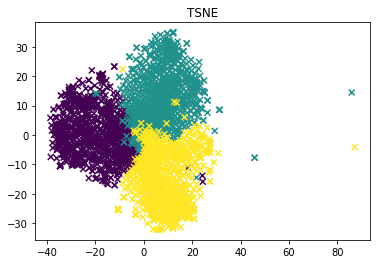

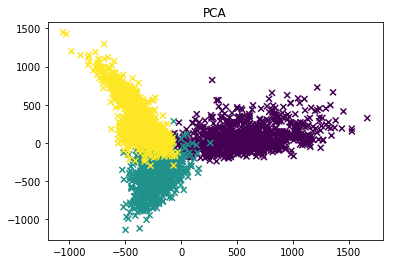

In [42]:
import matplotlib.pyplot as plt

print('Purple: dog  Green: cat  Yellow: horse')
plt.figure()
plt.scatter(tsne2d[:, 0], tsne2d[:,1],c=y, marker='x')
plt.title('TSNE')

plt.figure()
plt.scatter(pca2d[:, 0], pca2d[:,1],c=y, marker='x')
plt.title('PCA')


<p style="text-align: right;">سه بعدی TSNE و PCA نمایش بردارهای</p>

Black: dog  Green: cat  Gray: horse


Text(0.5,0.92,'PCA')

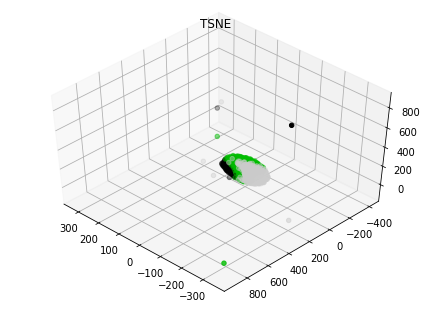

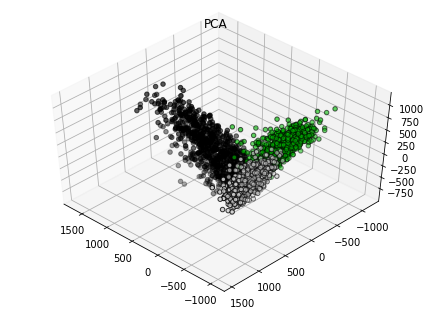

In [49]:
from mpl_toolkits.mplot3d import Axes3D

print('Black: dog  Green: cat  Gray: horse')
fig = plt.figure()
plt.clf()
plt.cla()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(tsne3d[:, 0], tsne3d[:,1], tsne3d[:,2],c=y, cmap=plt.cm.nipy_spectral)
plt.title('TSNE')

fig = plt.figure()
plt.clf()
plt.cla()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(pca3d[:, 0], pca3d[:,1], pca3d[:,2],c=y,cmap=plt.cm.nipy_spectral,edgecolor='k')
plt.title('PCA')